# Data Preproccising & Graph

[0 1]


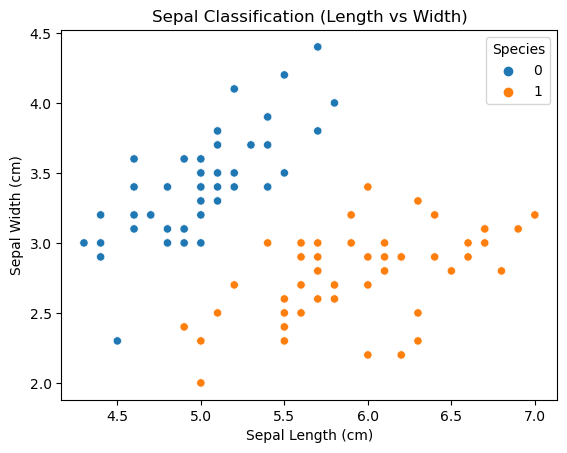

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,precision_recall_curve,precision_score,recall_score,f1_score

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


iris_data=load_iris()
df=pd.DataFrame(data=iris_data.data,columns=iris_data.feature_names)

df['target']=iris_data.target
df=df[df['target'].isin([0,1])]
print(df['target'].unique())

df

sns.scatterplot(x=df['sepal length (cm)'], y=df['sepal width (cm)'], hue=df['target'])
plt.title("Sepal Classification (Length vs Width)")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend(title="Species", loc="best")  
plt.show()


# Spiliting Data

In [3]:
X=df.loc[:,['sepal length (cm)','sepal width (cm)',"petal length (cm)","petal width (cm)"]]
y=df['target']

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

# Builing model

In [4]:

def train_perceptron_model(X_train, y_train, X_test, y_test):
  model = Perceptron(eta0=0.1, max_iter=1000)
  model.fit(X_train, y_train)
  y_pred_test = model.predict(X_test)
  print(classification_report(y_test, y_pred_test))

train_perceptron_model(X_train, y_train, X_test, y_test)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [5]:
model=Perceptron(eta0=0.1,max_iter=1000)
model.fit(X_train,y_train)
accuracy=accuracy_score(y_test, model.predict(X_test))
precision=precision_score(y_test, model.predict(X_test))
recall=recall_score(y_test, model.predict(X_test))
f1=f1_score(y_test, model.predict(X_test))

print("Accuracy:", accuracy)
print("Precision (weighted):", precision)
print("Recall (weighted):", recall)
print("F1 score (weighted):", f1)


Accuracy: 1.0
Precision (weighted): 1.0
Recall (weighted): 1.0
F1 score (weighted): 1.0


# Perceptron algorithm from scratch

In [6]:
def predict(row, weights):
    activation = weights[0]  
    for i in range(len(row) - 1):
        activation += weights[i + 1] * float(row[i])
    return 1.0 if activation >= 0.0 else 0.0

def train_weights(train, l_rate, n_epoch):
    train_list = train.values.tolist()
    weights = [0.0 for i in range(len(train_list[0]))]
    for epoch in range(n_epoch):
        sum_error = 0.0
        for row in train_list:
            prediction = predict(row, weights)
            error = row[-1] - prediction
            sum_error += error**2
            weights[0] = weights[0] + l_rate * error #bias(t+1) = bias(t) + learning_rate * (expected(t) - predicted(t))
            for i in range(len(row)-1):
                weights[i + 1] = weights[i + 1] + l_rate * error * row[i] #w(t+1) = w(t) + learning_rate * (expected(t) - predicted(t)) * x(t)
        print('epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
    return weights

l_rate = 0.4
n_epoch = 10000
weights = train_weights(df, l_rate, n_epoch)
print(weights)


epoch=0, lrate=0.400, error=2.000
epoch=1, lrate=0.400, error=2.000
epoch=2, lrate=0.400, error=1.000
epoch=3, lrate=0.400, error=0.000
epoch=4, lrate=0.400, error=0.000
epoch=5, lrate=0.400, error=0.000
epoch=6, lrate=0.400, error=0.000
epoch=7, lrate=0.400, error=0.000
epoch=8, lrate=0.400, error=0.000
epoch=9, lrate=0.400, error=0.000
epoch=10, lrate=0.400, error=0.000
epoch=11, lrate=0.400, error=0.000
epoch=12, lrate=0.400, error=0.000
epoch=13, lrate=0.400, error=0.000
epoch=14, lrate=0.400, error=0.000
epoch=15, lrate=0.400, error=0.000
epoch=16, lrate=0.400, error=0.000
epoch=17, lrate=0.400, error=0.000
epoch=18, lrate=0.400, error=0.000
epoch=19, lrate=0.400, error=0.000
epoch=20, lrate=0.400, error=0.000
epoch=21, lrate=0.400, error=0.000
epoch=22, lrate=0.400, error=0.000
epoch=23, lrate=0.400, error=0.000
epoch=24, lrate=0.400, error=0.000
epoch=25, lrate=0.400, error=0.000
epoch=26, lrate=0.400, error=0.000
epoch=27, lrate=0.400, error=0.000
epoch=28, lrate=0.400, error=0

In [7]:
pred = np.array([])
for index, row in df.iterrows():
    prediction = predict(row, weights)
    pred=np.append(pred,prediction)
    print("Expected=%d, Predicted=%d" % (row[-1], prediction))

Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Pred

/tmp/ipykernel_169665/4140715742.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  activation += weights[i + 1] * float(row[i])
/tmp/ipykernel_169665/2591585857.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Expected=%d, Predicted=%d" % (row[-1], prediction))


In [8]:
y_pred = [predict(row, weights) for row in X_test.values]
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

